In [1]:
from energia import * 

## Declare Model

A model is the central object in energia which collects all components 
and generates a mathematical program as parameters are provided 

In [2]:
m = Model()

## Spatio Temporal Objects 

These are referred to as scope components, as they provide context to the extent of the system 
as well as the frequency of decision-making as a function of the fidelity of input parameter sets.

### Location 

Locations are nested. In the example below:
1. Texas (TX) is made up of College Station and Houston 
2. USA is made up of TX and California (Cali)

In [3]:
m.cll = Loc(label = 'College Station')
m.hst = Loc(label = 'Houston')
m.tx = m.cll + m.hst
m.tx.label = 'Texas'
m.cal = Loc(label = 'California')
m.usa = m.tx + m.cal

We can check what locations are nested under a given location

In [4]:
m.usa.has 

(cal, tx)

To go lower down the order 

In [5]:
m.usa.alsohas 

(hst, cll)

The most expansive location is the network.

In [6]:
m.network 

usa

### Temporal Periods 

Temporal scales can be constructed as a function of root time periods.

Here, the year consists of two quarters 

In [7]:
m.q = Period(label = 'Quarter')
m.y = 4 * m.q
m.y.label = 'Year'

## Basis Units 

In [8]:
m.mw = Unit(label='Megawatt')
m.kw = m.mw / 1000
m.g = Unit(label='Gram')
m.kg = 1000 * m.g
m.ton = m.kg * 1000
m.mton = m.ton * 1000
m.mile = Unit(label='Mile')
m.km = m.mile * 1.60934
m.acre = Unit(label='Acre')

The conversion between units can be checked as shown below 

In [9]:
m.mw.howmany(m.kw)

1000

## Resources

These include the general Resource, as also Material, Cash, Emission, Indicators (Eco, Env, Soc), Land, etc. 

Note that these are all essentially treated the same, however such classification can help!

In [10]:
m.usd = Cash(label = 'Money')
m.gwp = Env(label = 'Global Warming Potential')

The flows of resources can be dependent 
for example, the use of land in the industrial park 
can incur expenditure besides also having an environmental impact 

In [11]:
m.indlnd = Land(basis = m.acre, label = 'Industrial Land')

Actions (decisions) such as how much industrial land can be bought, can be bound

In [12]:
m.indlnd.buy <= 4000 

Checkout the program at any point using .pprint()

In [13]:
m.pprint()

Mathematical Program for Program(m)

---Index Sets---



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Non-Negative Variables:


<IPython.core.display.Math object>


---Such that---

Inequality Constraints:


<IPython.core.display.Math object>

Note that in the absence of a given spatiotemporal context,
the model assumes that the parameter applies to the entire spatial network and temporal horizon
In the case of bounds, this implies a limit on the sum 
In the case of a calculation, this implies that the same value is applied across the network

The consequence of buying are that money is spent, and that there are emissions.

Here we assume that the land costs differ by location, but the GWP impact is universal 

In [14]:
m.indlnd.buy(m.tx)[m.usd.spend] == 10000
m.indlnd.buy(m.cal)[m.usd.spend] == 20000
m.indlnd.buy[m.gwp.emit] == 30 

In [15]:
m.pprint()

Mathematical Program for Program(m)

---Index Sets---



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Non-Negative Variables:


<IPython.core.display.Math object>


---Such that---

Inequality Constraints:


<IPython.core.display.Math object>

Equality Constraints:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Similarly, we declare Solar, Wind, Power, and apply some constraint to meet a Power demand 

In [16]:
m.solar = Resource(basis = m.mw)
m.solar.buy <= 5000

m.wind = Resource(basis = m.mw)
m.wind.buy <= 5000 

m.power = Resource(basis = m.mw)
# m.power.sell >= [180*0.6, 180*0.7, 180*0.8, 180*0.3]
m.power.sell(m.tx) >= [180*0.6, 180*0.7, 180*0.8, 180*0.3]
m.power.sell(m.cal) >= [20*0.6, 20*0.7, 20*0.8, 20*0.3]
m.power.sell >= 400

In setting a bound for selling power, a temporal context is not provided. 

However, given that exactly 4 datapoints are provided, energia determines that this data set applies to each quarter 

Use .pprint(True) to get a descriptive print 

In [17]:
m.pprint(True)

Mathematical Program for Program(m)

---Index Sets---



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---Such that---

Inequality Constraints:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Equality Constraints:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Some Power also goes towards the production of Hydrogen, which has an independent demand 

In [18]:
m.h2o = Resource(basis = m.kg)
m.h2o.buy(m.q) <= 200
m.h2o.buy[m.usd.spend] == 2

m.o2 = Resource(basis = m.kg)
m.o2.sell <= 500

m.h2 = Resource(basis = m.kg)
m.h2.sell(m.q) >= 30

Materials are just Resources, the below operations can be performed using the Resource object as well

Materials can be seen as resources earmarked for use in construction 

In [19]:
m.steel = Material(basis = m.ton)
m.steel.buy[m.usd.spend] == 40000 
m.steel.buy[m.gwp.emit] == 0.5
m.steel.use[m.gwp.emit] == 0.44
m.steel.buy(m.y) <= 20000

Notice that the act of buying and using in construction can each have a different impact 

This is generally true for any activity, energia does not enforce any checks in this regard
providing users the flexibility to define any relationship that best represents activity in a considered system 

## Processes

There are three types of Process Tasks - Process (Production), Storage, Transport 

In [20]:
m.pv = Process(label = 'Photovoltaic')

The principal attribute of any process is the conversion relationship, as shown below.

TThe sizing is defined as per the ability of the process to produce a unit basis of the resource in brackets.

In this case - Power 

In [21]:
m.pv(m.power) == -m.solar

In [22]:
m.pv.setup[m.usd.spend] == 567000
m.pv.setup[m.steel.use] == 20
m.pv.operate[m.usd.spend] == 90000
m.pv.operate <= [0.6, 0.8, 0.9, 0.7]
m.pv.setup <= 300

In [23]:
m.wf = Process()
m.wf(m.power) == -m.wind
m.wf.setup[m.usd.spend] == 990637
m.wf.setup[m.steel.use] == 15
m.wf.operate[m.usd.spend] == 4953
m.wf.operate <= [0.9, 0.8, 0.5, 0.7]
m.wf.setup <= 300

Not all conversions are simple, as seen in the case of an electrolyzer.

where,

1. the conversion is defined on the basis of consumption. Do not forget the negative! 
2. multiple resources are required 

In [24]:
m.pem = Process()
m.pem(-m.power) == -2.0 * m.h2o + 3.7 * m.o2 + m.h2
m.pem.setup[m.usd.spend] == 1000
m.pem.setup[m.gwp.emit] == 0.1
m.pem.operate[m.usd.spend] == 1
m.pem.setup <= 400
m.pem.operate <= 1

Storage objects consist of a charging and discharging process, besides the inventory space. 

All of these can be tuned individually. 

In [25]:

m.battery = Storage()
m.battery.setup[m.usd.spend] == 1302182
# m.battery.setup[m.usd.spend] 
m.battery.setup <= 500
m.battery.charge.setup <= 200
m.battery.discharge.setup <= 200
m.battery(m.power) == 1.1
# m.battery.charge.operate[m.usd.spend] == 0.01
# m.battery.discharge.operate[m.usd.spend] == 0.01
# m.battery.charge.setup[m.usd.spend] == 0.01
# m.battery.discharge.setup[m.usd.spend] == 0.01


In [26]:
# m.usd.spend.opt()
m.gwp.emit.opt()


Set parameter Username
Academic license - for non-commercial use only - expires 2025-12-10
Read MPS format model from file Program(m).mps
Reading time = 0.00 seconds
PROGRAM(M): 170 rows, 142 columns, 413 nonzeros
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 170 rows, 142 columns and 413 nonzeros
Model fingerprint: 0xaff0bd59
Coefficient statistics:
  Matrix range     [1e-01, 1e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 2e+04]
Presolve removed 146 rows and 120 columns
Presolve time: 0.01s
Presolved: 24 rows, 22 columns, 63 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+01   1.350000e+02   0.000000e+00      0s
      16    3.4753891e+03   0.000000e+00   0.000000e+00 

In [27]:
m.program.cons_space_balance0.pprint()

<IPython.core.display.Math object>

In [28]:
m.usa.has 

(cal, tx)

In [29]:
m.pprint()

Mathematical Program for Program(m)

---Index Sets---



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---Objective(s)---



<IPython.core.display.Math object>

Non-Negative Variables:


<IPython.core.display.Math object>


---Such that---

Inequality Constraints:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Equality Constraints:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [30]:
m.setup.sol()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [31]:
m.operate.sol()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [32]:
m.setup.sol()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [33]:
m.spend.sol()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
m.operate.sol()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

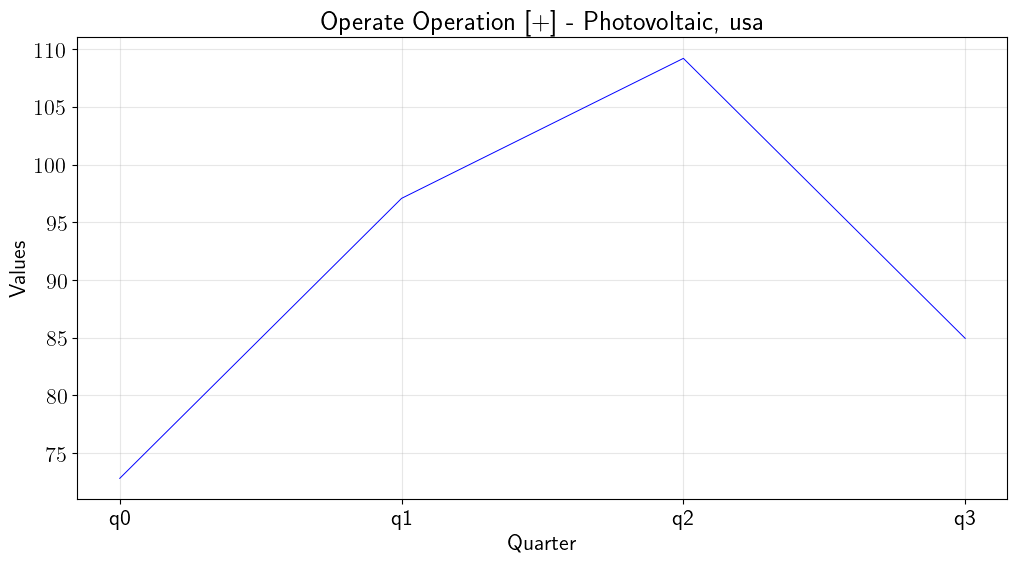

In [35]:
m.operate.plot(x = m.q, y= (m.pv, m.usa))

In [36]:
m.buy.sol()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [37]:
m.sell.sol()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>